In [4]:
import math
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.circuit.library import QFT
%matplotlib inline

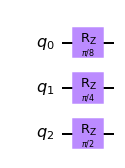

In [292]:
qc_rotations = QuantumCircuit(3, name='z_rotations')
qc_rotations.rz(math.pi/8,0)
qc_rotations.rz(math.pi/4,1)
qc_rotations.rz(math.pi/2,2)

z_rotations_gate = qc_rotations.to_gate().control()

qc_rotations.draw(output="mpl")

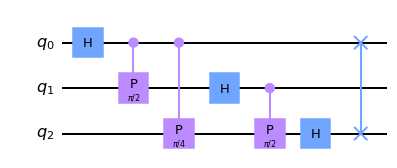

In [293]:
qft_gate_inv = QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft_gate_inverse')
qft_gate_inverse = qft_gate_inv.to_gate()

qft_gate_inv.draw(output="mpl")

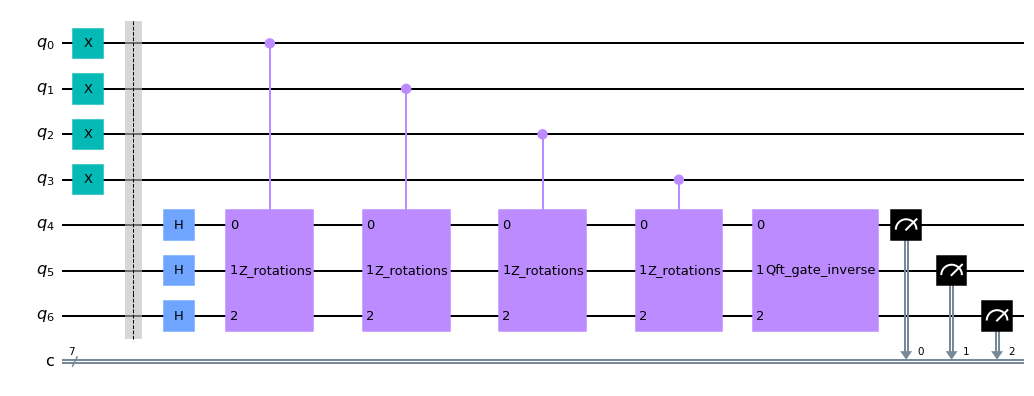

In [310]:
qc = QuantumCircuit(7, 7)
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.barrier()
qc.h(4)
qc.h(5)
qc.h(6)
#qc.crz(math.pi/8,0,4)
#qc.crz(math.pi/4,0,5)
#qc.crz(math.pi/2,0,6)
#qc.barrier()
#qc.crz(math.pi/8,1,4)
#qc.crz(math.pi/4,1,5)
#qc.crz(math.pi/2,1,6)
#qc.barrier()
#qc.crz(math.pi/8,2,4)
#qc.crz(math.pi/4,2,5)
#qc.crz(math.pi/2,2,6)
#qc.barrier()
#qc.crz(math.pi/8,3,4)
#qc.crz(math.pi/4,3,5)
#qc.crz(math.pi/2,3,6)
#qc.barrier()
qc.append(z_rotations_gate, [0,4,5,6])
qc.append(z_rotations_gate, [1,4,5,6])
qc.append(z_rotations_gate, [2,4,5,6])
qc.append(z_rotations_gate, [3,4,5,6])
qc.append(qft_gate_inverse, [4,5,6])
qc.measure([4,5,6], [0,1,2])

qc.draw(output="mpl")

In [311]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [319]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1).result().get_counts()

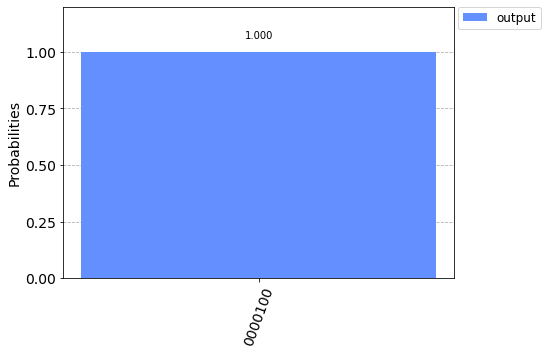

In [320]:
plot_histogram([sim_counts], legend=['output'])

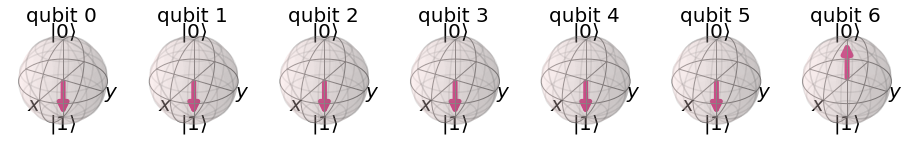

In [321]:
plot_bloch_multivector(sim_state_vector)